In [22]:
# Data manipulation
%pip install pandas
import pandas as pd
import numpy as np # pyright: ignore[reportMissingImports]

# Data visualization
%pip install matplotlib seaborn
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Machine learning
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# load dataset

try:
    url = "https://raw.githubusercontent.com/hiraubaid75/ckd-prediction-system/main/Chronic_Kidney_disease_dataset.csv"
    df = pd.read_csv(url)
    #df = pd.read_csv(r"D:\Atomcamp\New folder\Chronic_Kidney_disease_dataset.csv")
    print("✅ Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("❌ File not found. Check the path.")
except Exception as e:
    print("❌ Error while loading dataset:", e)

✅ Dataset loaded successfully!
   age  gender  blood_pressure  specific_gravity  albumin  sugar pus_cell  \
0   62  female            50.0             1.020        4      4   normal   
1   44  female            90.4             1.010        1      0   normal   
2   20    male            65.1             1.010        0      0   normal   
3   66  female            99.1             1.025        2      0   normal   
4   54    male            70.2             1.020        1      0   normal   

  pus_cell_clumps bacteria  blood_glucose_random  ...  packed_cell_volume  \
0          absent   absent                  98.1  ...                38.3   
1          absent   absent                 186.2  ...                41.0   
2          absent   absent                 201.3  ...                36.5   
3          absent   absent                 151.9  ...                38.1   
4          absent   absent                 163.7  ...                31.4   

   white_blood_cell_count  red_blood_cell_c

Load & quick inspect

In [24]:
# display basic information about the dataset
print("shape:", df.shape)
display(df.head())
display(df.info())


shape: (30000, 25)


,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,female,50.0,1.020,4,4,normal,absent,absent,98.1,...,38.3,10132,5.8,yes,yes,yes,good,yes,no,1
1,44,female,90.4,1.010,1,0,normal,absent,absent,186.2,...,41.0,6703,6.0,yes,yes,no,good,yes,no,0
2,20,male,65.1,1.010,0,0,normal,absent,absent,201.3,...,36.5,6712,5.6,yes,no,no,good,no,no,0
3,66,female,99.1,1.025,2,0,normal,absent,absent,151.9,...,38.1,5327,5.7,no,yes,yes,good,yes,no,0
4,54,male,70.2,1.020,1,0,normal,absent,absent,163.7,...,31.4,6573,3.9,yes,yes,no,good,yes,no,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30000 non-null  int64  
 1   gender                   30000 non-null  object 
 2   blood_pressure           30000 non-null  float64
 3   specific_gravity         30000 non-null  float64
 4   albumin                  30000 non-null  int64  
 5   sugar                    30000 non-null  int64  
 6   pus_cell                 30000 non-null  object 
 7   pus_cell_clumps          30000 non-null  object 
 8   bacteria                 30000 non-null  object 
 9   blood_glucose_random     30000 non-null  float64
 10  blood_urea               30000 non-null  float64
 11  serum_creatinine         30000 non-null  float64
 12  sodium                   30000 non-null  float64
 13  potassium                30000 non-null  float64
 14  hemoglobin            

None

Data set contains 30000 rows and 25 columns

Missing values & types

In [25]:
missing_df = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
print(missing_df[missing_df['missing_count'] > 0])

# Calculate missing value percentage for each column
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': missing_percent
})
print(missing_df[missing_df['missing_count'] > 0])

Empty DataFrame
Columns: [missing_count]
Index: []
Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []


Clean text, normalize & coerce numeric columns

In [26]:
#Examine data types
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

age                          int64
gender                      object
blood_pressure             float64
specific_gravity           float64
albumin                      int64
sugar                        int64
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count       int64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
anemia                      object
pedal_edema                 object
ckd                          int64
dtype: object
Numeric columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blo

AS CKD is a target table so we can drop Ckd from numerical columns

In [27]:
#drop ckd from numerical columns
numeric_cols.remove('ckd')
print("Numeric columns after removing target variable 'Ckd':", numeric_cols)

Numeric columns after removing target variable 'Ckd': ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [28]:
display(df.describe(include='all'))

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
count,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000,30000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,NaN
top,NaN,male,NaN,NaN,NaN,NaN,normal,absent,absent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,NaN
freq,NaN,16468,NaN,NaN,NaN,NaN,25488,26979,28564,NaN,...,NaN,NaN,NaN,19574,21061,27073,27008,17916,25545,NaN
mean,49.977067,NaN,80.676730,1.017245,2.417633,0.775133,NaN,NaN,NaN,123.433163,...,41.991253,8486.678500,5.195840,NaN,NaN,NaN,NaN,NaN,NaN,0.165600
std,14.919311,NaN,18.929556,0.005613,1.461787,1.200479,NaN,NaN,NaN,54.003448,...,5.011280,2461.036226,0.702358,NaN,NaN,NaN,NaN,NaN,NaN,0.371727
min,2.000000,NaN,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,50.000000,...,25.000000,3000.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,40.000000,NaN,66.600000,1.015000,1.000000,0.000000,NaN,NaN,NaN,79.000000,...,38.600000,6779.000000,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,50.000000,NaN,80.200000,1.015000,2.000000,0.000000,NaN,NaN,NaN,119.700000,...,42.000000,8462.000000,5.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,60.000000,NaN,93.600000,1.020000,4.000000,1.000000,NaN,NaN,NaN,160.500000,...,45.400000,10157.000000,5.700000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [29]:
# normalize string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# replace common missing markers with NaN
df.replace({'?': np.nan, 'unknown': np.nan, '': np.nan}, inplace=True)

In [30]:
display(df.describe(include='all'))

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
count,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000,30000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,NaN
top,NaN,male,NaN,NaN,NaN,NaN,normal,absent,absent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,NaN
freq,NaN,16468,NaN,NaN,NaN,NaN,25488,26979,28564,NaN,...,NaN,NaN,NaN,19574,21061,27073,27008,17916,25545,NaN
mean,49.977067,NaN,80.676730,1.017245,2.417633,0.775133,NaN,NaN,NaN,123.433163,...,41.991253,8486.678500,5.195840,NaN,NaN,NaN,NaN,NaN,NaN,0.165600
std,14.919311,NaN,18.929556,0.005613,1.461787,1.200479,NaN,NaN,NaN,54.003448,...,5.011280,2461.036226,0.702358,NaN,NaN,NaN,NaN,NaN,NaN,0.371727
min,2.000000,NaN,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,50.000000,...,25.000000,3000.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,40.000000,NaN,66.600000,1.015000,1.000000,0.000000,NaN,NaN,NaN,79.000000,...,38.600000,6779.000000,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,50.000000,NaN,80.200000,1.015000,2.000000,0.000000,NaN,NaN,NaN,119.700000,...,42.000000,8462.000000,5.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,60.000000,NaN,93.600000,1.020000,4.000000,1.000000,NaN,NaN,NaN,160.500000,...,45.400000,10157.000000,5.700000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Summary after cleaning

In [31]:
print("shape after cleaning:", df.shape)
display(df.isnull().sum().sort_values(ascending=False).head(15))


shape after cleaning: (30000, 25)


age                     0
gender                  0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
pus_cell                0
pus_cell_clumps         0
bacteria                0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hemoglobin              0
dtype: int64

Outlier detection

In [32]:
# =======================
# 4. Outlier Detection + Treatment
# =======================
def cap_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[feature] = np.where(data[feature] < lower, lower, data[feature])
    data[feature] = np.where(data[feature] > upper, upper, data[feature])

for col in numeric_cols:
    if col in df.columns:
        cap_outliers(df, col)


Feature Engineering

In [33]:
# =======================
# 5. Feature Engineering
# =======================

# Age groups
df['age_group'] = pd.cut(df['age'], bins=[0,40,60,80,120], labels=['young','middle','senior','elderly'])

# Diabetes + Hypertension interaction
df['diab_hyp'] = np.where((df['diabetes_mellitus']=='yes') & (df['hypertension']=='yes'), 1, 0)

# Anemia derived from hemoglobin
df['low_hb_flag'] = np.where(df['hemoglobin'] < 11, 1, 0)

# Normalize ordinal scales
df['albumin_norm'] = df['albumin'] / df['albumin'].max()
df['sugar_norm'] = df['sugar'] / df['sugar'].max()

# Ratios
df['bun_creatinine_ratio'] = df['blood_urea'] / (df['serum_creatinine']+1e-5)
df['rbc_wbc_ratio'] = df['red_blood_cell_count'] / (df['white_blood_cell_count']+1e-5)


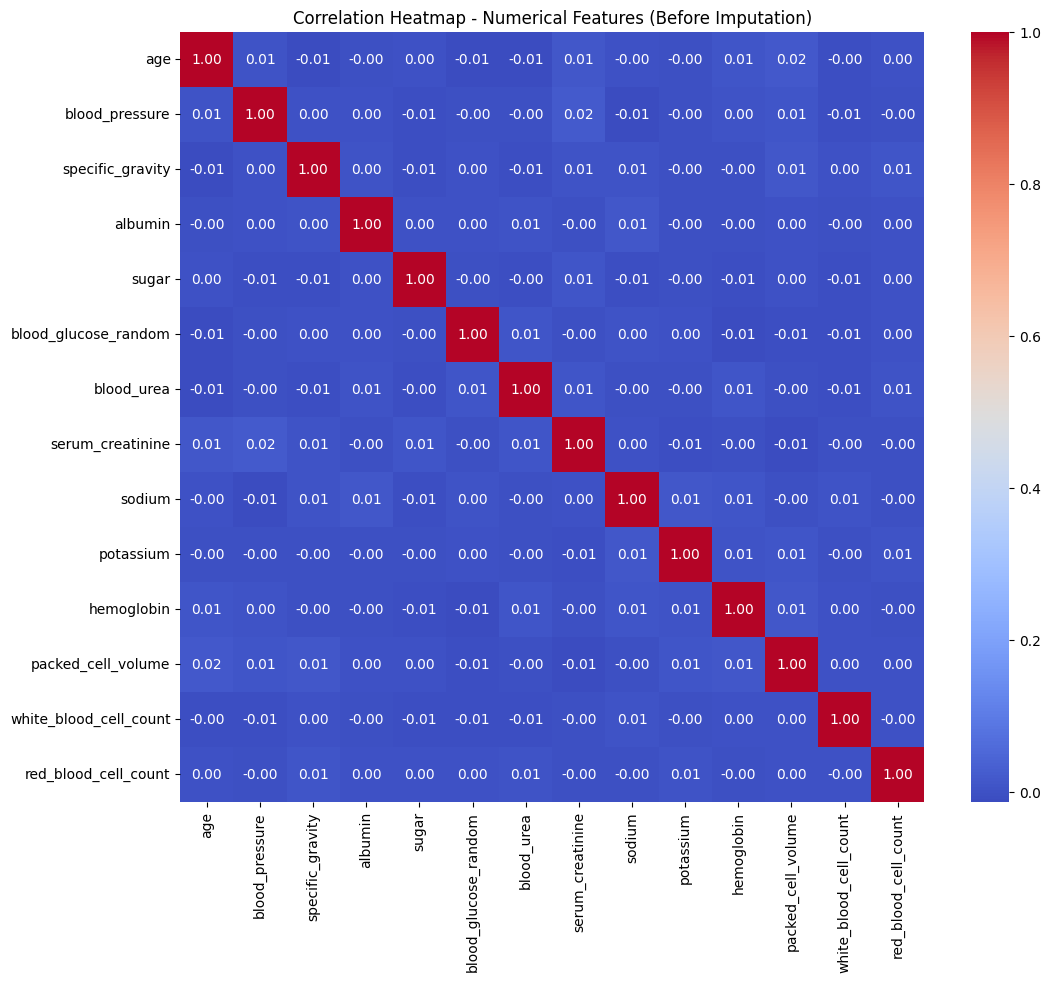

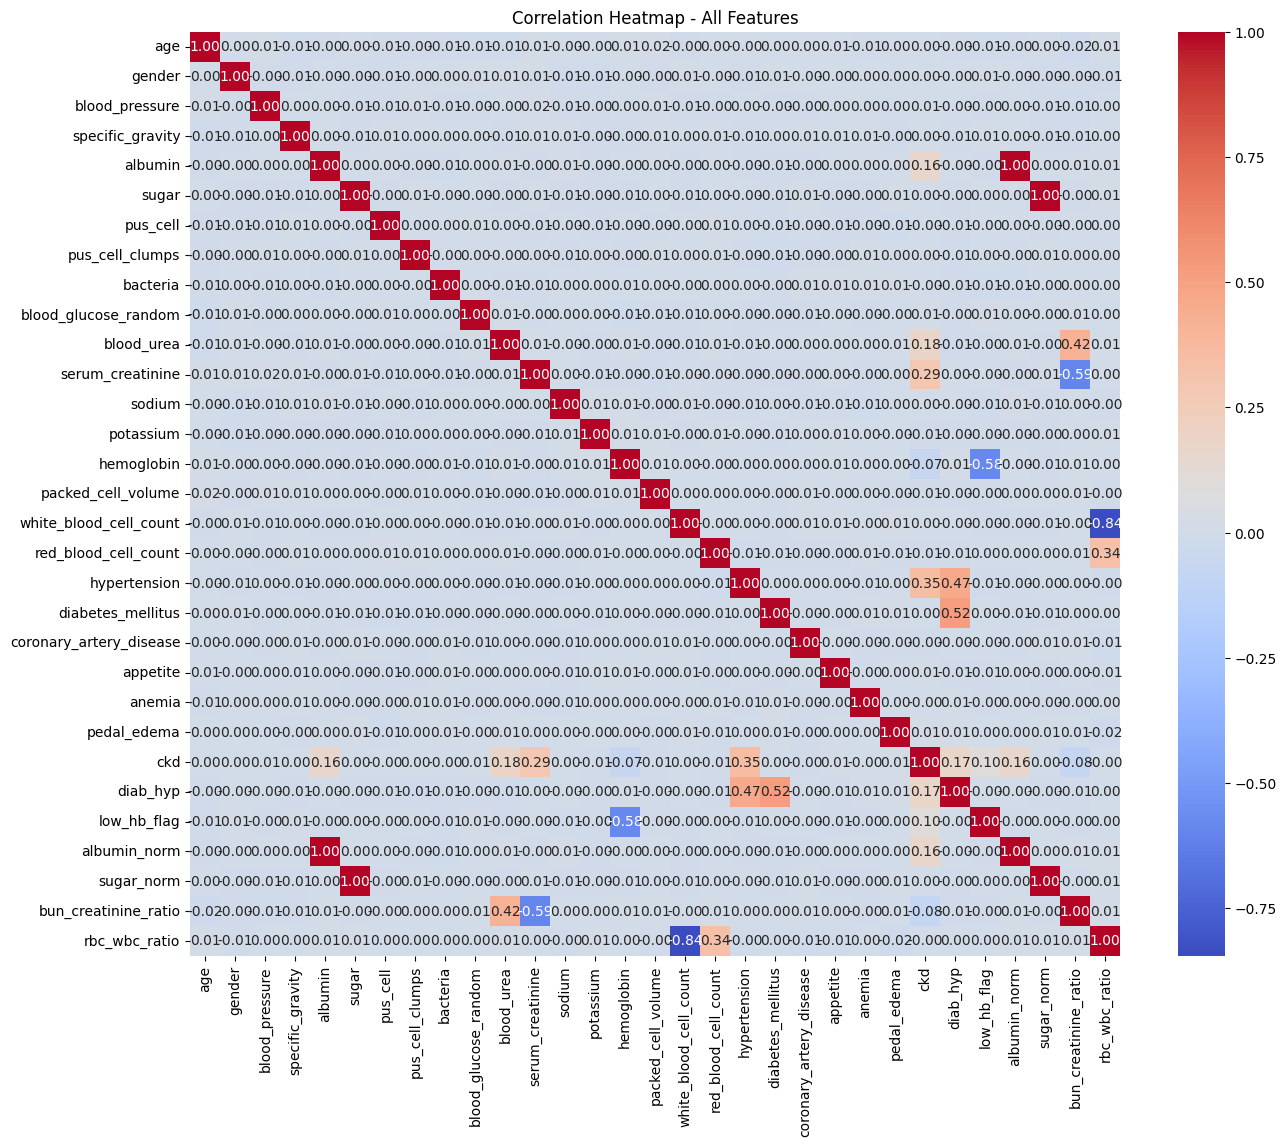

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numerical Features (Before Imputation)")
plt.show()

# Optional: Encode categorical columns temporarily for full correlation
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Drop non-numeric columns before correlation
df_corr = df_encoded.drop(columns=['age_group'])

plt.figure(figsize=(15,12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - All Features" )
plt.show()

Prepare X, y and identify feature types

In [35]:
# target
y = df['ckd']
X = df.drop(columns=['ckd'])

# automatic detection
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("numeric:", numeric_features)
print("categorical:", categorical_features)

numeric: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'diab_hyp', 'low_hb_flag', 'albumin_norm', 'sugar_norm', 'bun_creatinine_ratio', 'rbc_wbc_ratio']
categorical: ['gender', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'anemia', 'pedal_edema', 'age_group']


Preprocessing pipeline (impute, scale, encode)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# List of numeric and categorical columns
numeric_features = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 
                    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 
                    'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 
                    'red_blood_cell_count']

categorical_features = ['gender', 'pus_cell', 'pus_cell_clumps', 'bacteria']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Example: transform your dataset
# X_preprocessed = preprocessor.fit_transform(df)


Train / test split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Pipelines

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate model
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

models = {
    'Logistic Regression': pipe_lr,
    'KNN': pipe_knn,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf
}

# Step 10: Train and Evaluate Baseline Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1-score:", f1_score(y_test, y_pred, pos_label=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.8371666666666666
Precision: 0.5910780669144982
Recall: 0.15497076023391812
F1-score: 0.24555984555984556
Confusion Matrix:
 [[4864  110]
 [ 867  159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4974
           1       0.59      0.15      0.25      1026

    accuracy                           0.84      6000
   macro avg       0.72      0.57      0.58      6000
weighted avg       0.80      0.84      0.80      6000

--- KNN ---
Accuracy: 0.8295
Precision: 0.5045317220543807
Recall: 0.1627680311890838
F1-score: 0.24613117170228446
Confusion Matrix:
 [[4810  164]
 [ 859  167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      4974
           1       0.50      0.16      0.25      1026

    accuracy                           0.83      6000
   macro avg       0.68      0.56      0.58      6000


Best Parameters (Random Forest): {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
--- Tuned Random Forest ---
Accuracy: 0.8686666666666667
Precision: 0.9958333333333333
Recall: 0.23294346978557504
F1-score: 0.37756714060031593
Confusion Matrix:
 [[4973    1]
 [ 787  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      4974
           1       1.00      0.23      0.38      1026

    accuracy                           0.87      6000
   macro avg       0.93      0.62      0.65      6000
weighted avg       0.89      0.87      0.83      6000



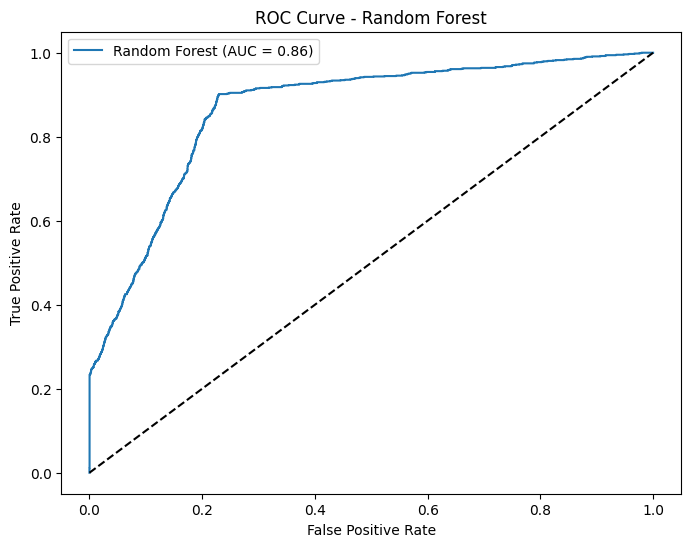

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# Step 11: Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Step 12: Evaluate Tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:,1]

print("--- Tuned Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label=1))
print("F1-score:", f1_score(y_test, y_pred_rf, pos_label=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 13: ROC Curve for Random Forest
roc_auc = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.savefig("images/roc_curve_rf.png", bbox_inches="tight")
plt.show()
plt.close()

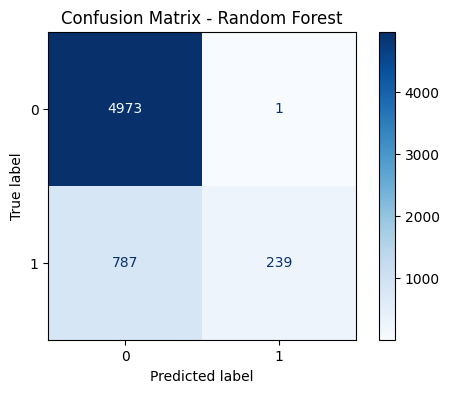

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
# Make sure folder exists
os.makedirs("images", exist_ok=True)
# Use the best Random Forest pipeline (already tuned)
rf_pipe = best_rf
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Random Forest")

# Save BEFORE show/close
plt.savefig("images/confusion_matrix_rf.png", bbox_inches="tight")
plt.show()
plt.close(fig)   # closes properly, avoids memory leak


Feature Importance (Bar Chart)

C:\Users\User\AppData\Local\Temp\ipykernel_18664\926531314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette="viridis")


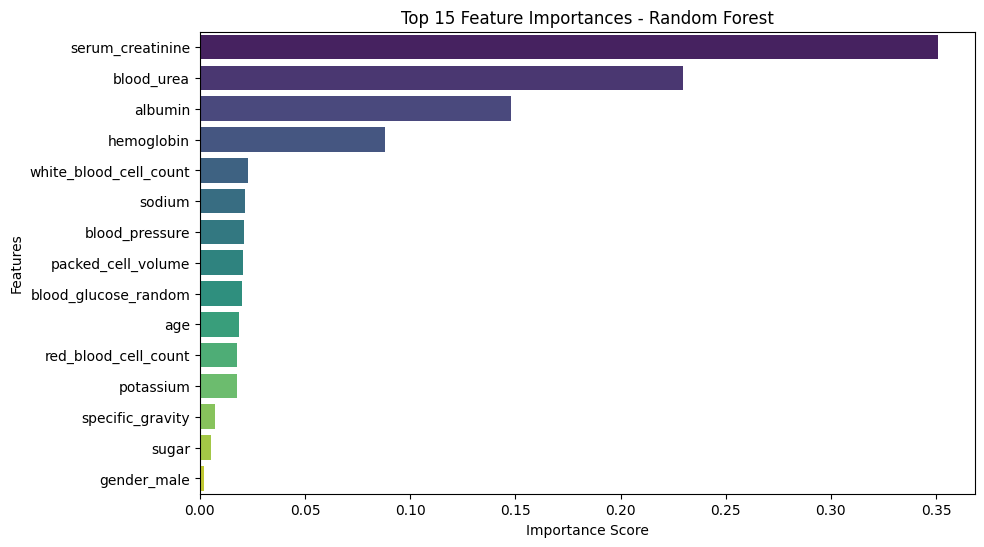

In [41]:
# after you have a fitted RandomForest pipeline named `best_rf`
# extract feature names
# Extract feature names after encoding
ohe = rf_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_cols = ohe.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(ohe_cols)

importances = rf_pipe.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig("images/feature_importance_rf.png", bbox_inches="tight")
plt.show()
plt.close()

Probability Distribution 

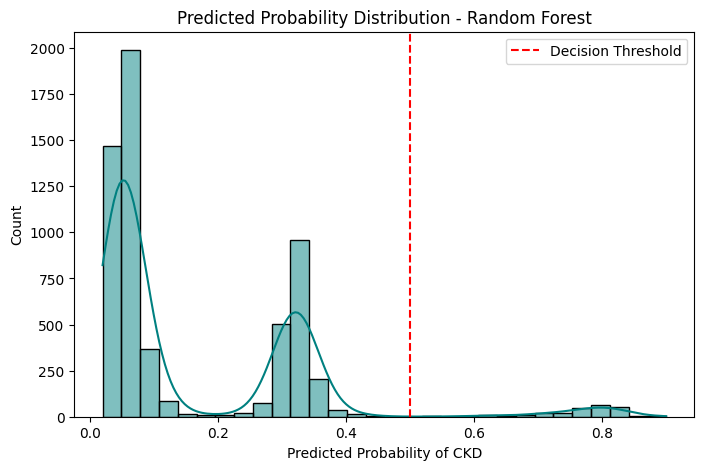

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(y_prob_rf, bins=30, kde=True, color="teal")
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold')
plt.title("Predicted Probability Distribution - Random Forest")
plt.xlabel("Predicted Probability of CKD")
plt.ylabel("Count")
plt.legend()
plt.savefig("images/probability_distribution_rf.png", bbox_inches="tight")
plt.show()
plt.close()

save trained model

In [46]:
# save model

import pickle as pkl

with open('best_random_forest_model.pkl', 'wb') as file:
    pkl.dump(best_rf, file)

                    #pkl.dump(best_rf, 'best_random_forest_model.pkl')

In [44]:
%pip install streamlit

import streamlit as st
import sklearn
import matplotlib

print("SK", sklearn.__version__)
print("plt", matplotlib.__version__)  
print("sns", sns.__version__)  
print("st", st.__version__)   
print("np", np.__version__)  


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
SK 1.7.2
plt 3.10.6
sns 0.13.2
st 1.49.1
np 2.3.3
